This notebook will load and store experiments' data fro each agent and all number of users

Then you can visualize the numerical and symbolic distribution of each agent's combination in the next code cells.

这个笔记本将加载并存储每个代理和所有用户数量的实验数据
然后，您可以在接下来的代码单元中可视化每个智能体组合的数值和符号分布。

In [1]:
import sys
sys.path.insert(0, '../../')

# # Import libraries # 导入数据处理和可视化所需的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx # 导入networkx库，用于创建、操作和研究复杂网络的结构、动态和功能
# NetworkX可以创建图结构，表示节点和边的关系，用于关联规则可视化
import ast  # 抽象语法树库，用于安全地解析字符串为Python数据结构
# Jupyter魔法命令，让matplotlib图表直接显示在笔记本中
%matplotlib inline
import plotly.graph_objects as go # 交互式绘图库，创建动态可交互图表
from plotly.subplots import make_subplots # 创建多个子图的工具

# Import Constants 导入项目中定义的常量【导入配置】
from script.experiments_constants import AGENT_EXPERIMENT_INFO
# 从experiments_constants模块导入AGENT_EXPERIMENT_INFO常量
# 这应该包含不同智能体实验的配置信息，比如：
# AGENT_EXPERIMENT_INFO = {
#     "embb-trf1": {
#         "name": "embb-trf1",
#         "experiment_directories": [1,2,3,4,5,6,7,8],
#         "num_of_users": {1:6, 2:5, ...}
#     },
#     ...
# }

from script.experiments_constants import ENV_KPI_NAME_LIST
# 从experiments_constants模块导入ENV_KPI_NAME_LIST常量
# 这应该包含环境关键性能指标(KPI)的名称列表，比如：
# ENV_KPI_NAME_LIST = ['tx_brate', 'tx_pckts', 'dl_buffer']
# 这些是网络切片环境中要监控的性能指标

from script.load_data import handle_data
# 从load_data模块导入handle_data函数
# 这个函数用于加载和处理实验数据，主要功能：
# 1. 检查是否有缓存的CSV文件
# 2. 如果没有，从原始日志文件加载并处理数据
# 3. 返回清洗后的KPI数据和决策数据
# 使用示例：kpi_data, decision_data = handle_data(agent_info, user_number=6)



from script.symbolic_representation import create_symbolic_state_decision_matrix
# 从symbolic_representation模块导入create_symbolic_state_decision_matrix函数
# 这个函数是SYMBXRL的核心功能，用于创建符号状态决策矩阵
# 它将数值状态和决策转换为基于一阶逻辑(FOL)的符号表示

# 函数作用：将连续的、数值的网络状态和决策转换为离散的符号规则
# 输入：数值KPI数据 + 数值决策数据
# 输出：符号化规则数据

# Preprocess Data and SymbXRL process:【SRG】
In this cell we will load the log file of all agents and store the mined data, and cleaned data slongside the symbxrl's fol-based symbolic represetnation.

 数据预处理和SymbXRL流程：
在这个单元中，我们将加载所有代理的日志文件，并存储挖掘的数据和清理后的数据，同时存储基于symbxrl的文件夹符号表示。

【利用symbolic_representation.py脚本，执行4×4的数据文件处理】

【1-加载数据+符号化】

In [2]:
agents = ['embb-trf1', 'embb-trf2', 'urllc-trf1', 'urllc-trf2']
# embb-trf1: 增强移动宽带 - 流量类型1
# embb-trf2: 增强移动宽带 - 流量类型2
# urllc-trf1: 超可靠低延迟通信 - 流量类型1
# urllc-trf2: 超可靠低延迟通信 - 流量类型2

# 定义要分析的用户数量列表
users = [3, 4, 5, 6]
# 选择3、4、5、6个用户的实验场景进行分析
# 论文意义：研究不同用户负载下的策略效果

# 开始遍历所有智能体和用户数量的组合
for agent in agents:
    for user in users:
        # 获取当前智能体的实验配置信息
        agent_info = AGENT_EXPERIMENT_INFO[agent]
        # 加载和处理实验数据
        kpi_data, decision_data = handle_data(agent_info, user)
        # 创建符号化状态决策矩阵【“表格”】 - 这是SYMBXRL的核心步骤
        symbolic_df, marker_df = create_symbolic_state_decision_matrix(kpi_data, decision_data, agent_info, user)
         # 将PRB决策和调度决策合并成一张表，便于后续分析【大csv表格(符号化后的kpi+决策)】
        symbolic_df['combined_decision'] = symbolic_df.apply(lambda row: f"{row['prb_decision']} - {row['sched_decision']}", axis=1)
        # 打印当前处理进度
        print(f"Agent: {agent} - Users: {user}")
        print("")
        

Agent: embb-trf1 - Users: 3

Agent: embb-trf1 - Users: 4

Agent: embb-trf1 - Users: 5

Agent: embb-trf1 - Users: 6

Agent: embb-trf2 - Users: 3

Agent: embb-trf2 - Users: 4

Agent: embb-trf2 - Users: 5

Agent: embb-trf2 - Users: 6

Agent: urllc-trf1 - Users: 3

Agent: urllc-trf1 - Users: 4

Agent: urllc-trf1 - Users: 5

Agent: urllc-trf1 - Users: 6

Agent: urllc-trf2 - Users: 3

Agent: urllc-trf2 - Users: 4

Agent: urllc-trf2 - Users: 5

Agent: urllc-trf2 - Users: 6



# Load and Show some results for each one of the agents

In this part we will load the data of one of the agents and visualize some of the numerical data.
加载并展示每个代理的一些结果
在本部分中，我们将加载其中一个智能体的数据，并对部分数值数据进行可视化处理。

【选择其中一个】

In [3]:
# Choose one of the agents: 'embb-trf1', 'embb-trf2', 'urllc-trf1', 'urllc-trf2'
# 选择一个智能体进行分析：从4种网络切片类型中选择1种
agent = 'embb-trf2'
# 这里选择了"embb-trf2" - 增强移动宽带流量类型2
# 论文意义：专注于分析eMBB类型流量的特定行为模式
# 其他可选值：
# - 'embb-trf1': 增强移动宽带流量类型1
# - 'urllc-trf1': 超可靠低延迟通信流量类型1
# - 'urllc-trf2': 超可靠低延迟通信流量类型2

# Choose one of the users: 3, 4, 5, 6 - Combination of agent and user will determine a specific experiment
# 选择用户数量：3, 4, 5, 6 - 智能体和用户数量的组合确定一个具体的实验场景
user = 6
# 这里选择了6个用户的场景
# 论文意义：分析在高用户负载情况下的网络切片性能
# 注释说明：agent和user的组合唯一确定一个实验配置


# 获取选定智能体的实验配置信息
agent_info = AGENT_EXPERIMENT_INFO[agent]

# 加载和处理实验数据
kpi_data, decision_data = handle_data(agent_info, user)

# 创建符号化状态决策矩阵 - SYMBXRL核心转换步骤
symbolic_df, marker_df = create_symbolic_state_decision_matrix(kpi_data, decision_data, agent_info, user)
# 合并决策列，创建组合决策符号
symbolic_df['combined_decision'] = symbolic_df.apply(lambda row: f"{row['prb_decision']} - {row['sched_decision']}", axis=1)
# 技术细节：
# - apply(axis=1): 对DataFrame的每一行应用函数
# - lambda row: 匿名函数，row代表当前行的数据
# - f-string: 格式化字符串，将两个决策列用" - "连接

# 打印当前分析场景信息
print(f"Agent: {agent} - Users: {user}")
print("")  # 输出空行，使显示更清晰

Agent: embb-trf2 - Users: 6



## Plot the transmitt Bitrate【EE—概率分布分析】

Numerical and the symbolic representation
绘制传输比特率图
数值表示和符号表示

【2-绘图（tx_brate）】

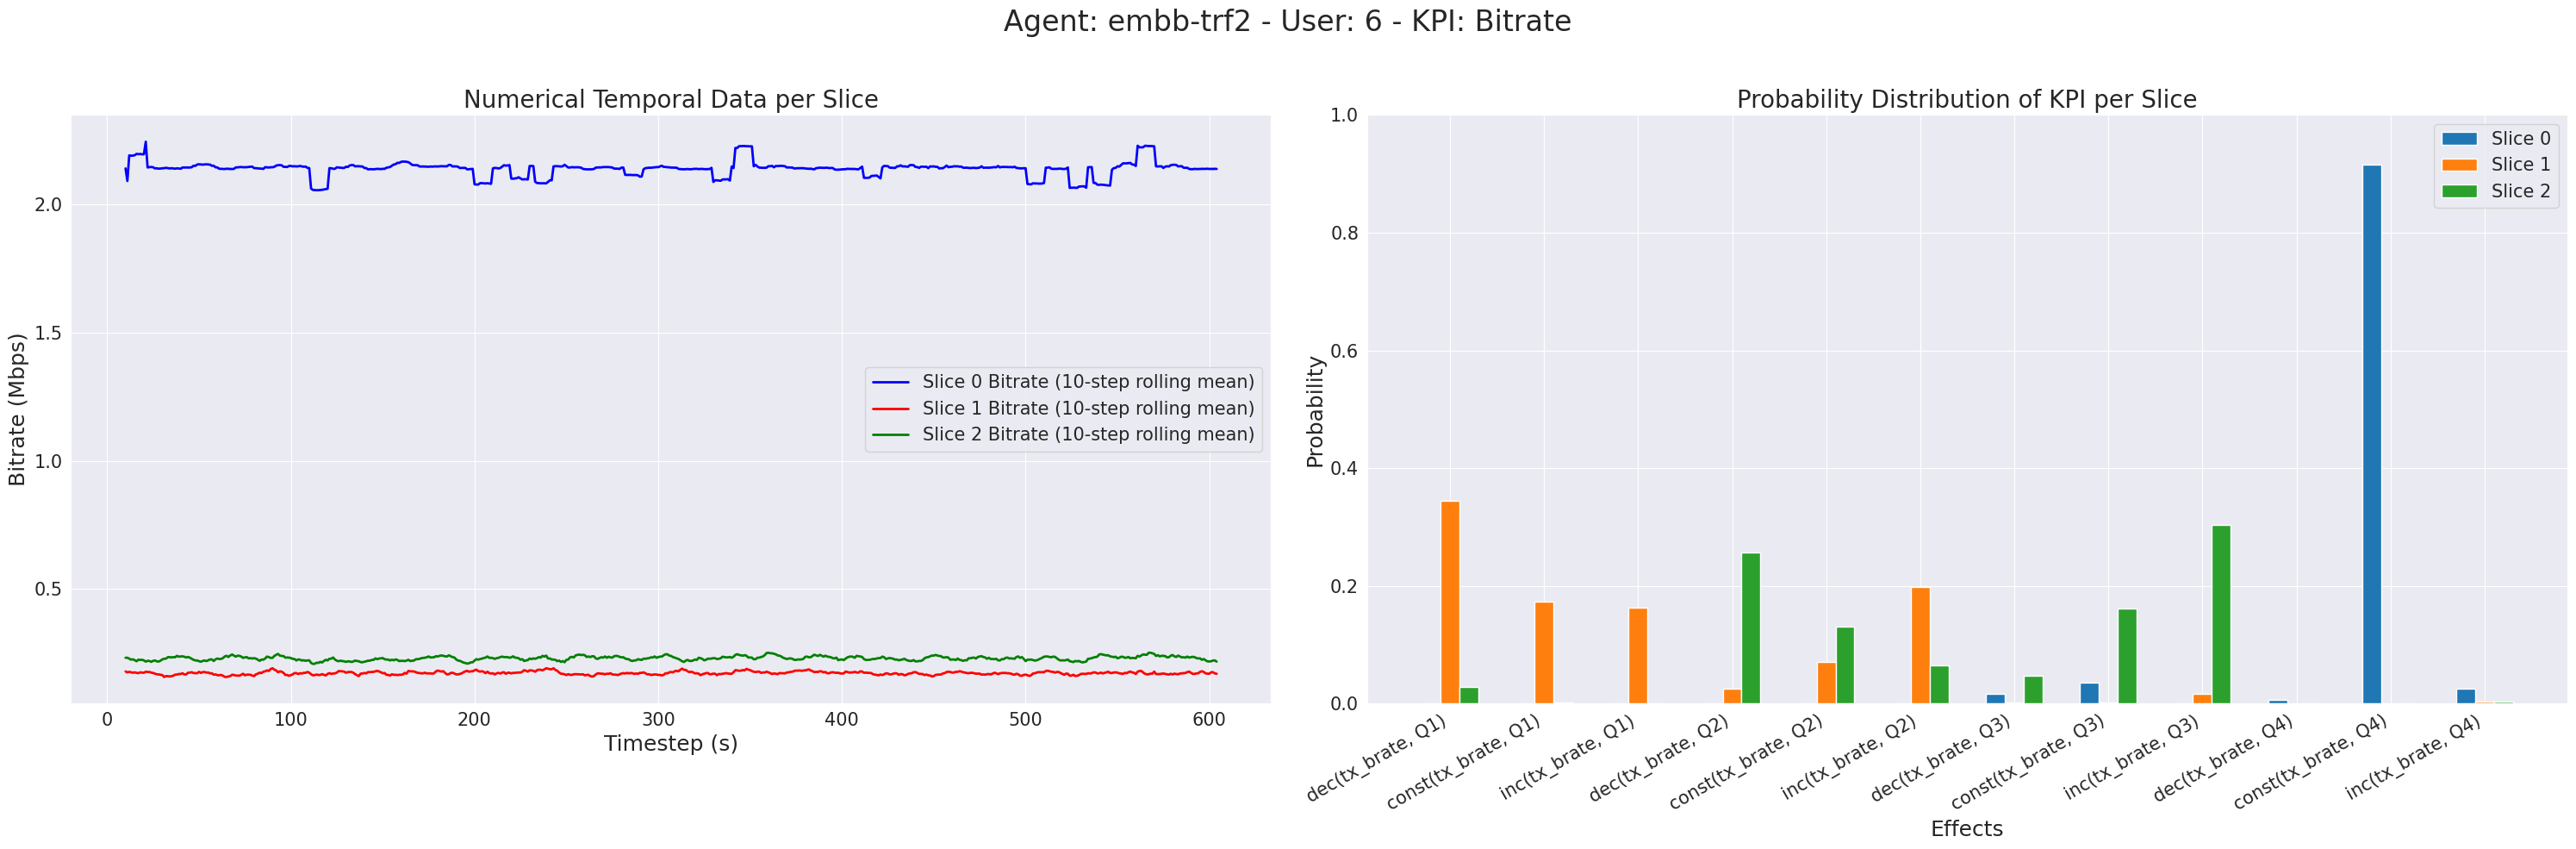

In [4]:
def create_effects_list(kpis=['tx_brate'], changes=['dec', 'const', 'inc']):
    """
    生成所有可能的符号化效果组合
    论文应用：系统地枚举所有可能的KPI变化模式，用于后续的概率分布分析
    """
    return {
        kpi: [f'{change}({kpi}, Q{quartile})' for quartile in range(1, 5) for change in changes] for kpi in kpis
    }
    # 列表推导式解析：
    # 对于每个kpi，生成所有变化类型和分位区间的组合
    # 示例输出：['dec(tx_brate, Q1)', 'const(tx_brate, Q1)', 'inc(tx_brate, Q1)',
    #           'dec(tx_brate, Q2)', 'const(tx_brate, Q2)', 'inc(tx_brate, Q2)', ...]
    # 总共：3种变化 × 4个分位区间 = 12种符号化效果

# 生成效果列表
effects_list = create_effects_list()
# effects_list = {
#     'tx_brate': ['dec(tx_brate, Q1)', 'const(tx_brate, Q1)', 'inc(tx_brate, Q1)', ...]
# }



# Create a 1x2 subplot figure
# 创建1行2列的子图，设置图形大小
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
# 1x2表示1行2列，figsize=(30,10)表示图形宽30英寸、高10英寸
# fig: 整个图形对象，ax: 包含两个子图轴的数组

# Main title for the figure
# 为整个图形设置主标题
fig.suptitle(f"Agent: {agent} - User: {user} - KPI: Bitrate", fontsize=24)
# 显示当前分析的智能体、用户数量和关注的KPI指标


# 第一个子图：每个切片的数值时序数据
# First subplot: Numerical temporal data per slice
colors = ['blue', 'red', 'green'] # 为三个切片定义不同的颜色
for slice_id in [0, 1, 2]: # 遍历三个网络切片
    # Extract the relevant data for each slice
    # 提取每个切片的相关数据
    # 获取时间步数据，从第10个时间步开始（跳过初始不稳定阶段），并减去10使时间从0开始
    timestep = kpi_data[kpi_data['slice_id'] == slice_id]['timestep'][10:] - 10
    # 获取比特率数据，应用10步滚动平均来平滑曲线，减少噪声
    bitrate = kpi_data[kpi_data['slice_id'] == slice_id]['tx_brate'][10:].rolling(window=10).mean()
    # rolling(window=10).mean()：计算每10个连续时间步的平均值


    # Plot the data
    # 绘制数据线
    ax[0].plot(timestep, bitrate, label=f'Slice {slice_id} Bitrate (10-step rolling mean)', color=colors[slice_id], linestyle='-', linewidth=2) # 使用预定义的颜色 # 实线 # 线宽为2

# Add grid, labels, title, and legend for the first subplot
# 为第一个子图添加网格、标签、标题和图例
ax[0].grid(True) # 显示网格线，便于读数
ax[0].set_xlabel("Timestep (s)", fontsize=18) # x轴标签
ax[0].set_ylabel("Bitrate (Mbps)", fontsize=18)  # y轴标签
ax[0].set_title("Numerical Temporal Data per Slice", fontsize=20) # 子图标题
ax[0].legend(fontsize=15)  # 显示图例
ax[0].tick_params(axis='both', labelsize=15) # 设置刻度标签字体大小


# Second subplot: Probability distribution of symbolic effects per slice
# 第二个子图：每个切片的符号化效果概率分布
bar_width = 0.2 # 设置柱状图的宽度
x = np.arange(len(effects_list['tx_brate'])) # 生成x轴位置：[0, 1, 2, ..., 11]

for i, slice_id in enumerate([0, 1, 2]): # 遍历三个切片，i是索引(0,1,2)
    # 计算每个切片中各种符号化效果的出现概率
    effect_counts = symbolic_df[symbolic_df['slice_id'] == slice_id]['tx_brate'].value_counts(normalize=True).reindex(effects_list['tx_brate'], fill_value=0).reset_index()
    effect_counts.columns = ['effects', 'probability']
    # 分步解析：
    # 1. symbolic_df[symbolic_df['slice_id'] == slice_id]['tx_brate']: 选择特定切片的比特率符号数据
    # 2. .value_counts(normalize=True): 计算每种符号的出现频率（归一化为概率）
    # 3. .reindex(effects_list['tx_brate'], fill_value=0): 重新索引，确保所有12种效果都有对应值，缺失的填0
    # 4. .reset_index(): 重置索引，将效果名称变成列


    
    # Plot the data as a bar plot
     # 绘制柱状图
    ax[1].bar(x + i * bar_width, effect_counts['probability'], bar_width, label=f'Slice {slice_id}')
    # x位置：基础位置 + 切片偏移  # 高度：概率值 # 宽度 # 图例标签

# Add grid, labels, and title for the second subplot
# 为第二个子图添加网格、标签和标题
ax[1].grid(True)  # 显示网格
ax[1].set_ylim(bottom=0, top=1)  # 设置y轴范围：0到1（概率范围）
ax[1].set_xticks(x + bar_width)  # 设置x轴刻度位置
ax[1].set_xticklabels(effect_counts['effects'], rotation=30, ha='right', fontsize=12)
# 设置x轴标签：效果名称，旋转30度，右对齐，字体大小12

ax[1].set_xlabel("Effects", fontsize=18)        # x轴标签
ax[1].set_ylabel("Probability", fontsize=18)    # y轴标签
ax[1].set_title("Probability Distribution of KPI per Slice", fontsize=20)  # 标题
ax[1].legend(fontsize=15)           # 图例
ax[1].tick_params(axis='both', labelsize=15)  # 刻度标签字体

# Adjust layout for better fit
# 调整布局以确保所有元素都能正确显示
plt.tight_layout(rect=[0, 0, 1, 0.95])
# tight_layout: 自动调整子图参数，使图形元素不重叠
# rect: 指定调整的矩形区域 [left, bottom, right, top]

# Show the plot
# 显示图形
plt.show()

## Plot the transmitted packets
【2-绘图（tx_pcks）】【同理】

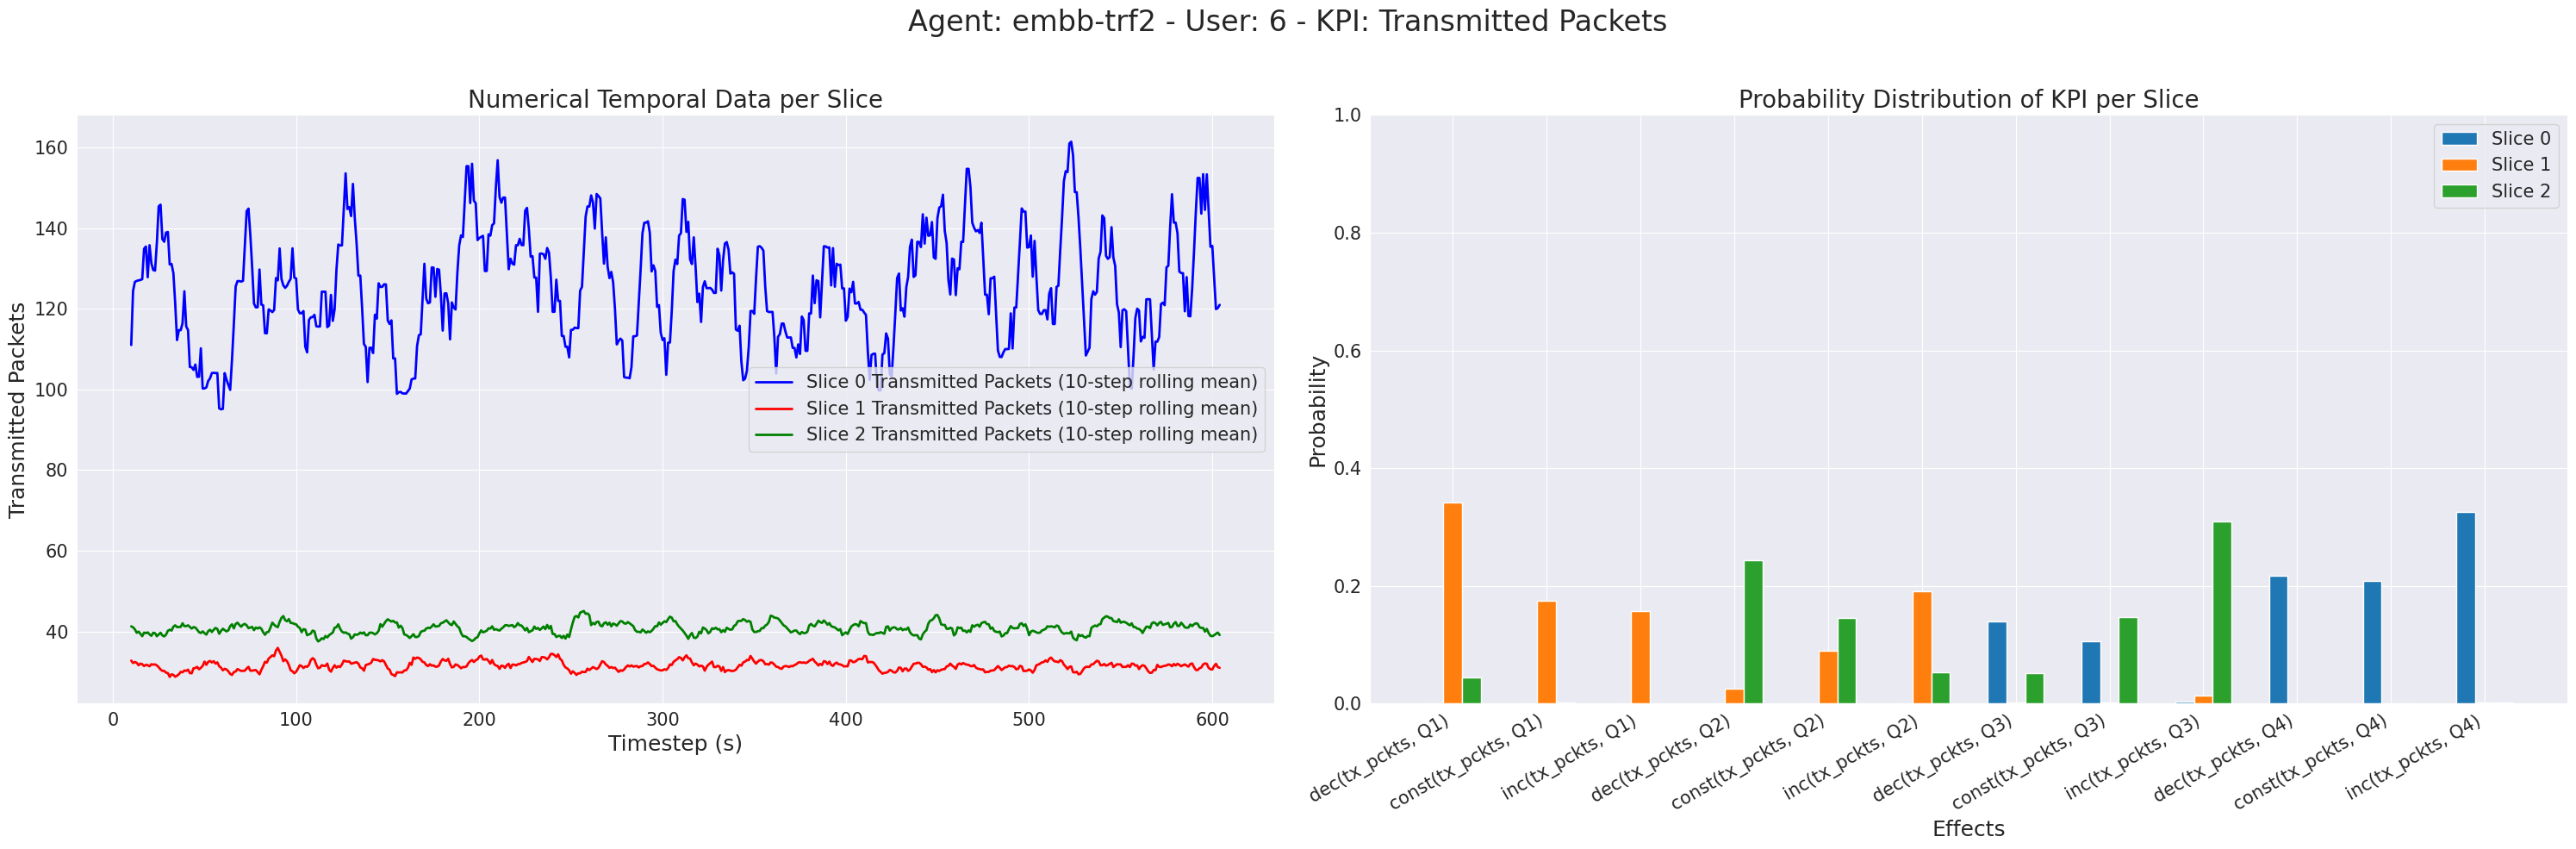

In [5]:
def create_effects_list(kpis=['tx_pckts'], changes=['dec', 'const', 'inc']):
    return {
        kpi: [f'{change}({kpi}, Q{quartile})' for quartile in range(1, 5) for change in changes] for kpi in kpis
    }

effects_list = create_effects_list()

# Create a 1x2 subplot figure
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

# Main title for the figure
fig.suptitle(f"Agent: {agent} - User: {user} - KPI: Transmitted Packets", fontsize=24)

# First subplot: Numerical temporal data per slice
colors = ['blue', 'red', 'green']
for slice_id in [0, 1, 2]:
    # Extract the relevant data for each slice
    timestep = kpi_data[kpi_data['slice_id'] == slice_id]['timestep'][10:] - 10
    tx_pckts = kpi_data[kpi_data['slice_id'] == slice_id]['tx_pckts'][10:].rolling(window=10).mean()
    
    # Plot the data
    ax[0].plot(timestep, tx_pckts, label=f'Slice {slice_id} Transmitted Packets (10-step rolling mean)', color=colors[slice_id], linestyle='-', linewidth=2)

# Add grid, labels, title, and legend for the first subplot
ax[0].grid(True)
ax[0].set_xlabel("Timestep (s)", fontsize=18)
ax[0].set_ylabel("Transmitted Packets", fontsize=18)
ax[0].set_title("Numerical Temporal Data per Slice", fontsize=20)
ax[0].legend(fontsize=15)
ax[0].tick_params(axis='both', labelsize=15)

# Second subplot: Probability distribution of symbolic effects per slice
bar_width = 0.2
x = np.arange(len(effects_list['tx_pckts']))

for i, slice_id in enumerate([0, 1, 2]):
    effect_counts = symbolic_df[symbolic_df['slice_id'] == slice_id]['tx_pckts'].value_counts(normalize=True).reindex(effects_list['tx_pckts'], fill_value=0).reset_index()
    effect_counts.columns = ['effects', 'probability']
    
    # Plot the data as a bar plot
    ax[1].bar(x + i * bar_width, effect_counts['probability'], bar_width, label=f'Slice {slice_id}')

# Add grid, labels, and title for the second subplot
ax[1].grid(True)
ax[1].set_ylim(bottom=0, top=1)
ax[1].set_xticks(x + bar_width)
ax[1].set_xticklabels(effect_counts['effects'], rotation=30, ha='right', fontsize=12)
ax[1].set_xlabel("Effects", fontsize=18)
ax[1].set_ylabel("Probability", fontsize=18)
ax[1].set_title("Probability Distribution of KPI per Slice", fontsize=20)
ax[1].legend(fontsize=15)
ax[1].tick_params(axis='both', labelsize=15)

# Adjust layout for better fit
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

## Plot the Buffer size
【2-绘图（dl_buffer）】【同理】

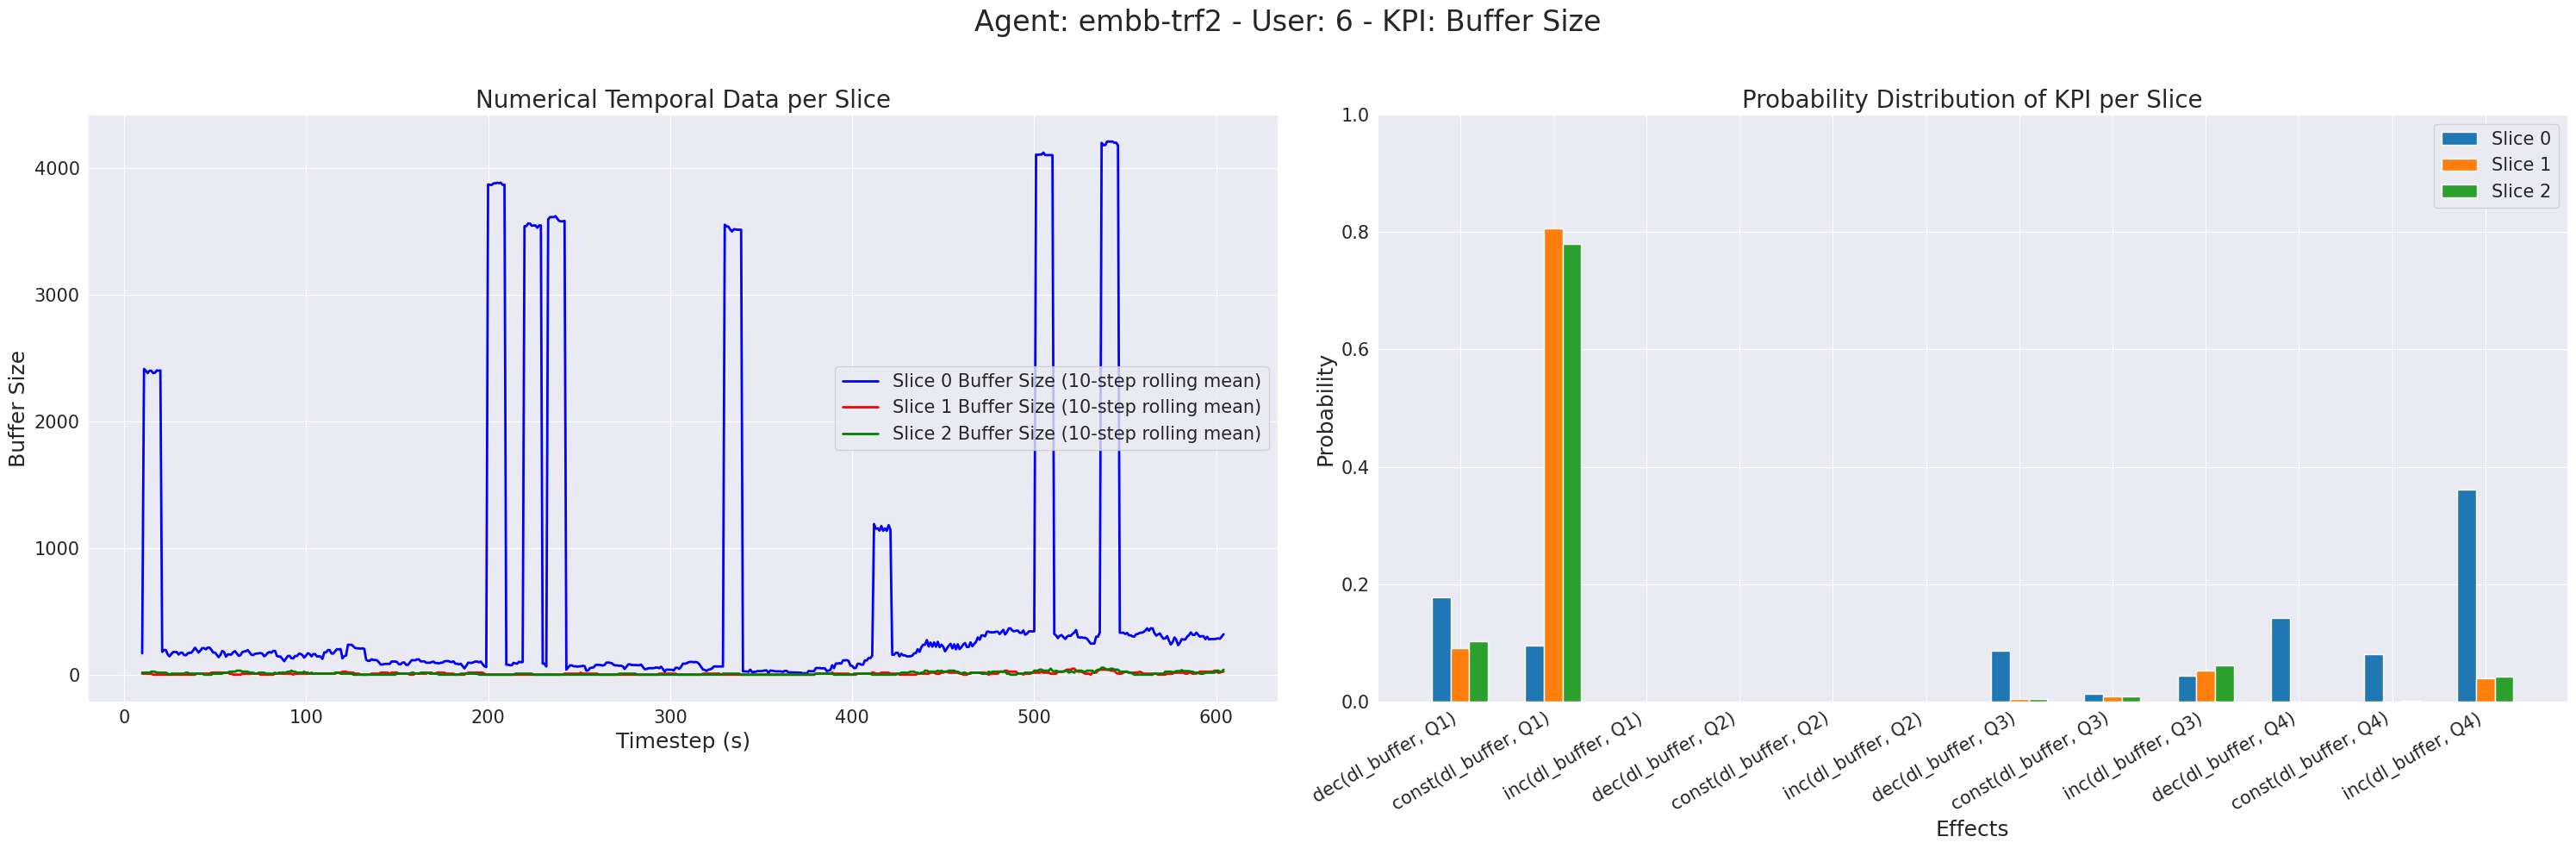

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def create_effects_list(kpis=['dl_buffer'], changes=['dec', 'const', 'inc']):
    return {
        kpi: [f'{change}({kpi}, Q{quartile})' for quartile in range(1, 5) for change in changes] for kpi in kpis
    }

effects_list = create_effects_list()

# Create a 1x2 subplot figure
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

# Main title for the figure
fig.suptitle(f"Agent: {agent} - User: {user} - KPI: Buffer Size", fontsize=24)

# First subplot: Numerical temporal data per slice
colors = ['blue', 'red', 'green']
for slice_id in [0, 1, 2]:
    # Extract the relevant data for each slice
    timestep = kpi_data[kpi_data['slice_id'] == slice_id]['timestep'][10:] - 10
    dl_buffer = kpi_data[kpi_data['slice_id'] == slice_id]['dl_buffer'][10:].rolling(window=10).mean()
    
    # Plot the data
    ax[0].plot(timestep, dl_buffer, label=f'Slice {slice_id} Buffer Size (10-step rolling mean)', color=colors[slice_id], linestyle='-', linewidth=2)

# Add grid, labels, title, and legend for the first subplot
ax[0].grid(True)
ax[0].set_xlabel("Timestep (s)", fontsize=18)
ax[0].set_ylabel("Buffer Size", fontsize=18)
ax[0].set_title("Numerical Temporal Data per Slice", fontsize=20)
ax[0].legend(fontsize=15)
ax[0].tick_params(axis='both', labelsize=15)

# Second subplot: Probability distribution of symbolic effects per slice
bar_width = 0.2
x = np.arange(len(effects_list['dl_buffer']))

for i, slice_id in enumerate([0, 1, 2]):
    effect_counts = symbolic_df[symbolic_df['slice_id'] == slice_id]['dl_buffer'].value_counts(normalize=True).reindex(effects_list['dl_buffer'], fill_value=0).reset_index()
    effect_counts.columns = ['effects', 'probability']
    
    # Plot the data as a bar plot
    ax[1].bar(x + i * bar_width, effect_counts['probability'], bar_width, label=f'Slice {slice_id}')

# Add grid, labels, and title for the second subplot
ax[1].grid(True)
ax[1].set_ylim(bottom=0, top=1)
ax[1].set_xticks(x + bar_width)
ax[1].set_xticklabels(effect_counts['effects'], rotation=30, ha='right', fontsize=12)
ax[1].set_xlabel("Effects", fontsize=18)
ax[1].set_ylabel("Probability", fontsize=18)
ax[1].set_title("Probability Distribution of KPI per Slice", fontsize=20)
ax[1].legend(fontsize=15)
ax[1].tick_params(axis='both', labelsize=15)

# Adjust layout for better fit
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()